# Heart Attack analysis using ANN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("heart.csv") # loading data from csv file
clean_data = data.dropna() # droping all NaN values
clean_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\anike\AppData\Local\Temp\ipykernel_6184\3194578063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_data['chol'])


<AxesSubplot: xlabel='chol', ylabel='Density'>

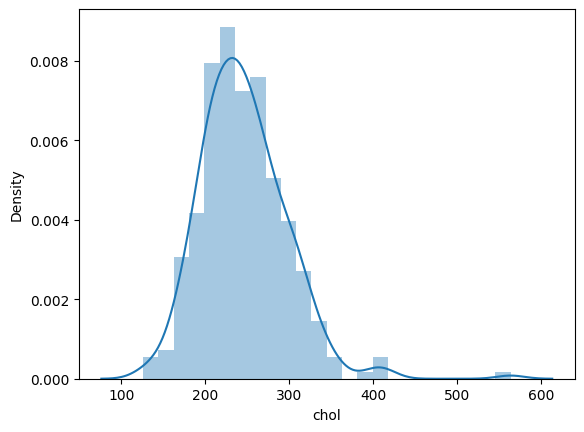

In [4]:
sns.distplot(clean_data['chol'])

In [5]:
import matplotlib.pyplot as plt

In [7]:

x = clean_data.drop(['output'],axis="columns") # splitting features 
y = clean_data.output # splitting target

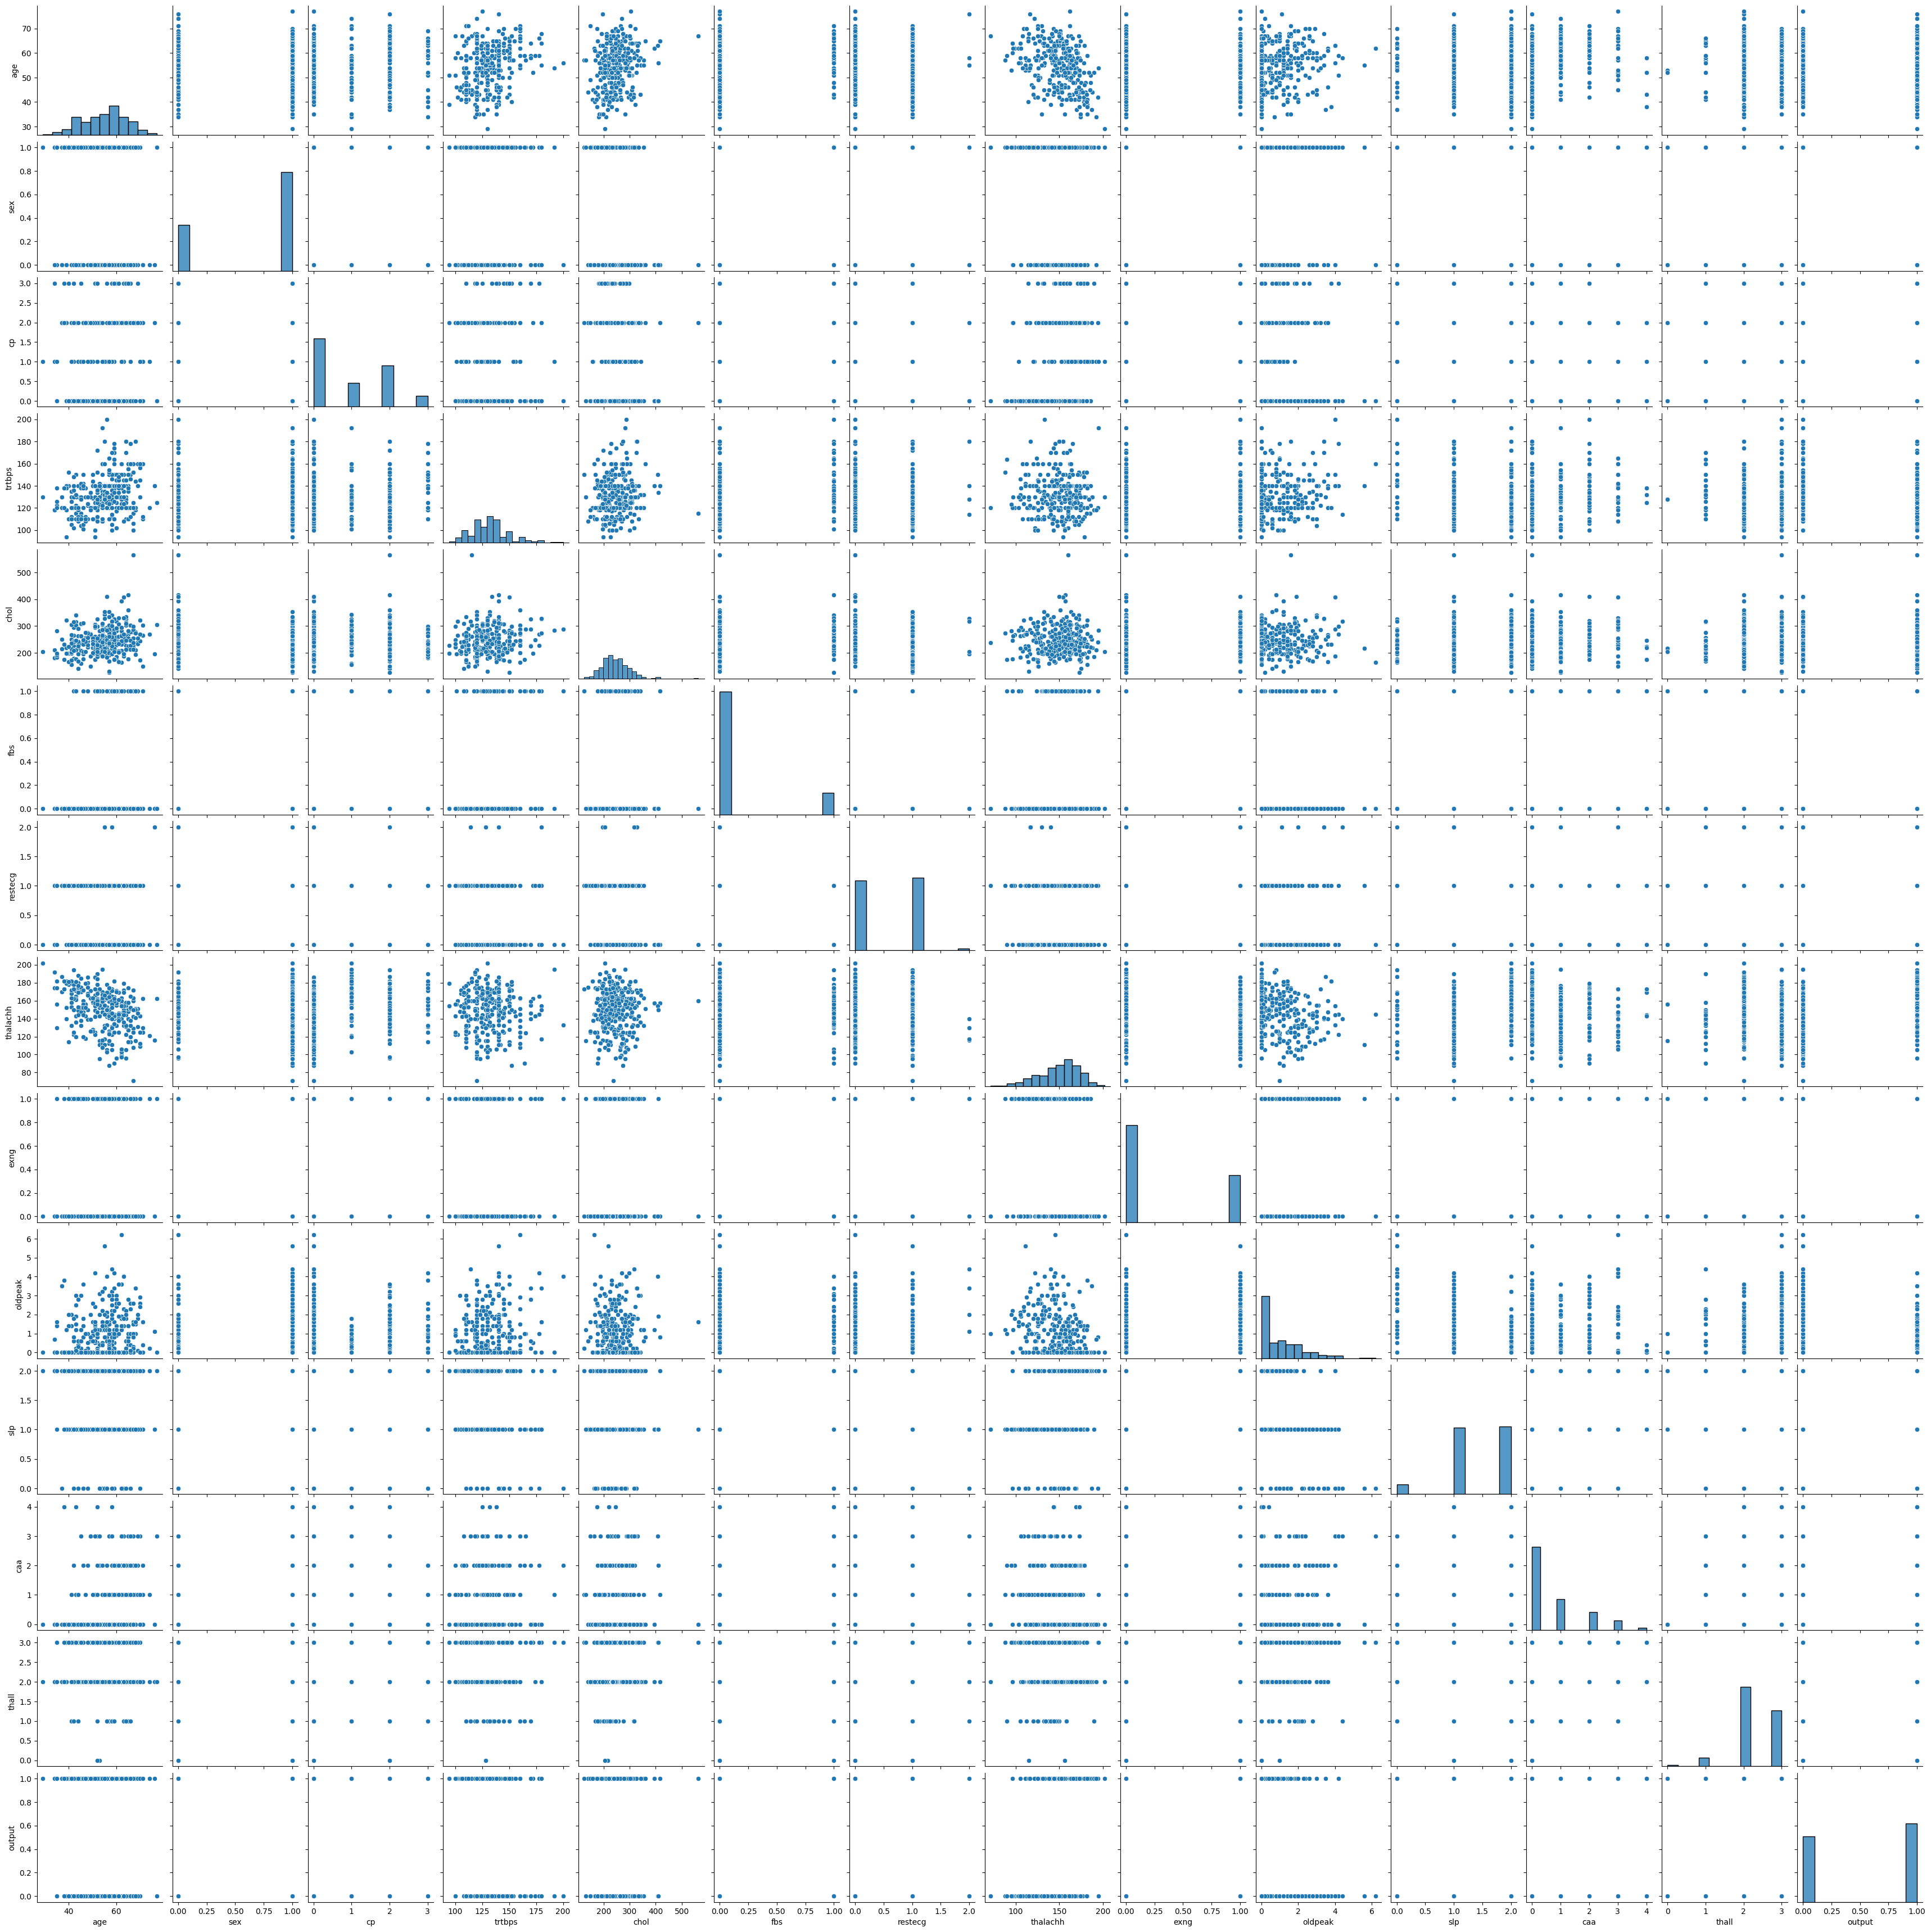

In [8]:
sns.pairplot(clean_data)

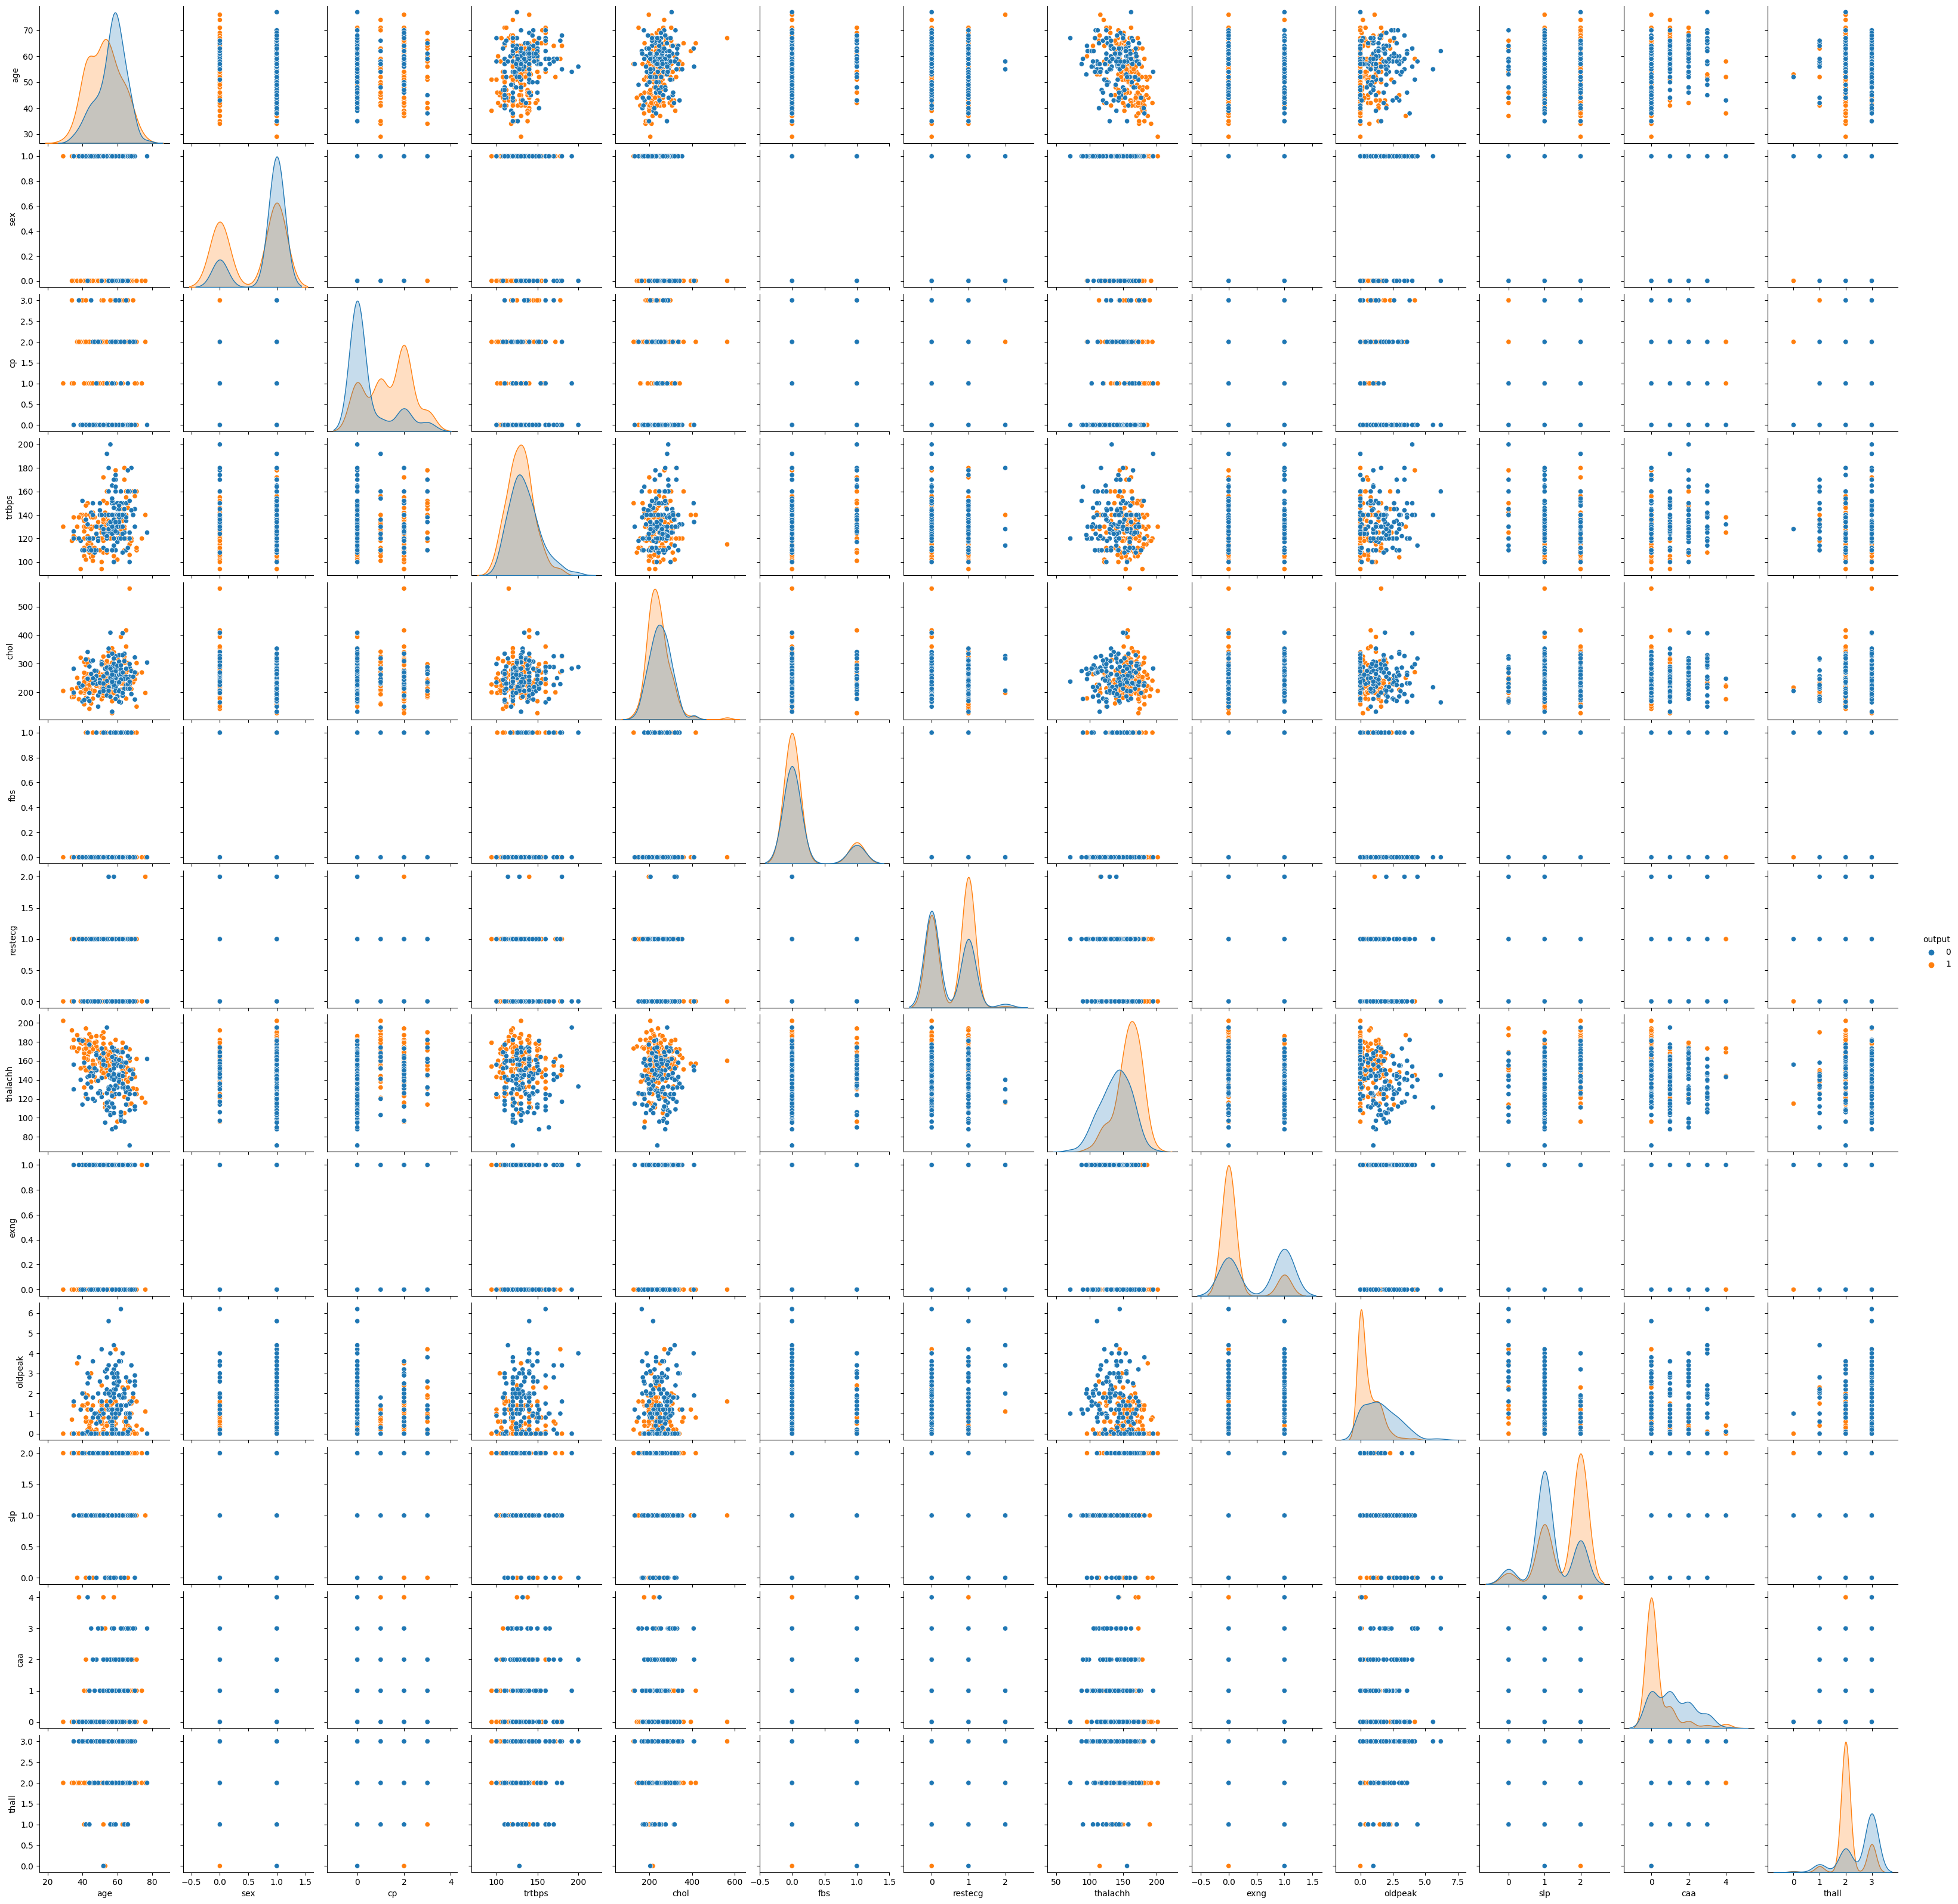

In [9]:
sns.pairplot(clean_data,hue="output")

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
x_train_scaled

array([[-0.27090572,  0.6636838 ,  1.9766492 , ..., -0.66896473,
        -0.72428597, -2.11701865],
       [ 1.3708101 , -1.50674161,  0.99843017, ...,  0.96628239,
         0.27160724, -0.47497213],
       [ 0.27633288,  0.6636838 ,  0.99843017, ...,  0.96628239,
         0.27160724,  1.16707438],
       ...,
       [-2.78820331,  0.6636838 ,  0.02021114, ...,  0.96628239,
        -0.72428597, -0.47497213],
       [-0.38035344,  0.6636838 , -0.95800789, ...,  0.96628239,
        -0.72428597,  1.16707438],
       [-0.05201028,  0.6636838 ,  0.99843017, ...,  0.96628239,
        -0.72428597,  1.16707438]])

In [68]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [109]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=13))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [110]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                224       
                                                                 
 dense_37 (Dense)            (None, 7)                 119       
                                                                 
 dense_38 (Dense)            (None, 1)                 8         
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [112]:
model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 1s 28ms/step - loss: 0.7494 - accuracy: 0.5392 - val_loss: 0.7885 - val_accuracy: 0.5600
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7223 - accuracy: 0.5392 - val_loss: 0.7646 - val_accuracy: 0.6000
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6996 - accuracy: 0.5576 - val_loss: 0.7407 - val_accuracy: 0.6400
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6769 - accuracy: 0.5714 - val_loss: 0.7206 - val_accuracy: 0.6800
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6572 - accuracy: 0.6037 - val_loss: 0.7021 - val_accuracy: 0.7200
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6383 - accuracy: 0.6083 - val_loss: 0.6855 - val_accuracy: 0.7200
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6207 - accuracy: 0.6544 - val_loss: 0.6700 - val_accuracy: 0.7200
Epoch 8/100
7/7 [=========

In [113]:
log_y = model.predict(x_test_scaled)

2/2 [==============================] - 0s 8ms/step


In [114]:
log_y

array([[0.01399819],
       [0.7330251 ],
       [0.05626195],
       [0.01175884],
       [0.07574557],
       [0.00559925],
       [0.02810085],
       [0.96907145],
       [0.01027695],
       [0.99955624],
       [0.15714435],
       [0.07965957],
       [0.98353946],
       [0.15080082],
       [0.45331234],
       [0.9907107 ],
       [0.9989076 ],
       [0.0330094 ],
       [0.77724385],
       [0.9434573 ],
       [0.99858284],
       [0.02253079],
       [0.6357239 ],
       [0.9959983 ],
       [0.9992694 ],
       [0.97105   ],
       [0.0081949 ],
       [0.98322105],
       [0.98776925],
       [0.9993851 ],
       [0.9937057 ],
       [0.9223741 ],
       [0.9416998 ],
       [0.9901787 ],
       [0.07456288],
       [0.66816455],
       [0.25109938],
       [0.20833886],
       [0.7306152 ],
       [0.13819937],
       [0.993749  ],
       [0.09598465],
       [0.06612267],
       [0.00982619],
       [0.9735042 ],
       [0.99642974],
       [0.14660689],
       [0.586

In [115]:
y_pred = np.where(log_y>0.5,1,0)
y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7704918032786885